# DIABETES PREDICTION :

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

df = pd.read_csv('Datasets\diabetes.csv')

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 0 : NON-DIABETIC

### 1 : DIABETIC

In [2]:
x = df.drop(columns= 'Outcome', axis = 1)
y = df['Outcome']

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = svm.SVC(kernel='linear')

clf.fit(x_train,y_train)

SVC(kernel='linear')

## Accuracy on training data

In [3]:
x_train_prediction = clf.predict(x_train)

accuracy_score(x_train_prediction,y_train)

0.7833876221498371

## Accuracy on test data :

In [4]:
x_test_prediction = clf.predict(x_test)

accuracy_score(x_test_prediction,y_test)

0.7727272727272727

In [5]:
input = (5,166,72,19,175,22.7,0.6,51)

x_input = np.array(input)

x_input = x_input.reshape(1,-1)

standard_input = scaler.transform(x_input)

prediction = clf.predict(standard_input)

c:\Users\ariha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [6]:
if(prediction == 0):
    print("NON_DIABETIC")

else:
    print("DIABETIC")

DIABETIC


---------------------------------------------------------

# MEDICAL INSURANCE COST PREDICTION :

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df = pd.read_csv('Datasets/insurance.csv')

## Data Description :

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.shape

(1338, 7)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


c:\Users\ariha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ariha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Age Distribution')

<Figure size 600x600 with 0 Axes>

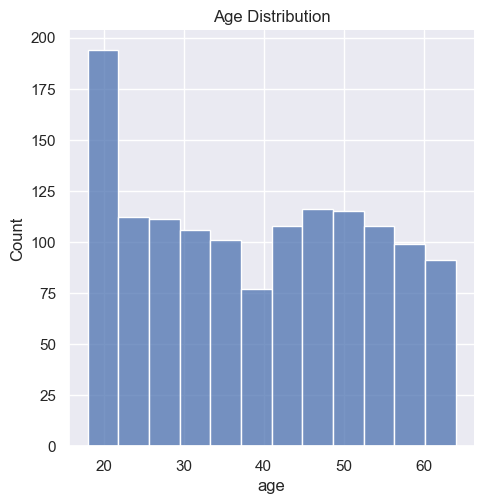

In [13]:
sns.set_theme()
plt.figure(figsize=(6,6))

sns.displot(df['age'])
plt.title("Age Distribution")

Text(0.5, 1.0, 'Sex Distribution')

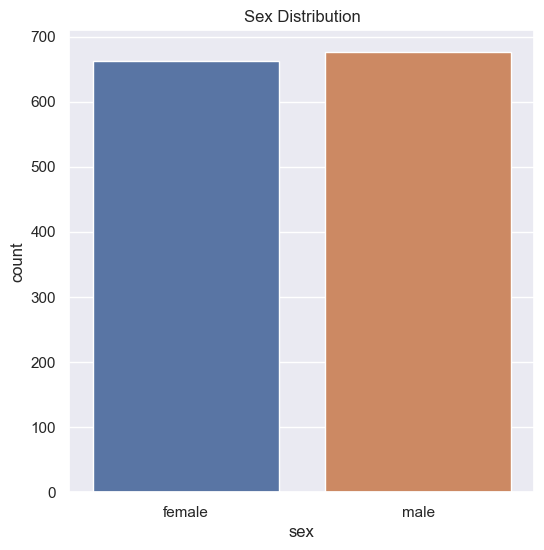

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x = "sex",data= df)
plt.title("Sex Distribution")

In [15]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

c:\Users\ariha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ariha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


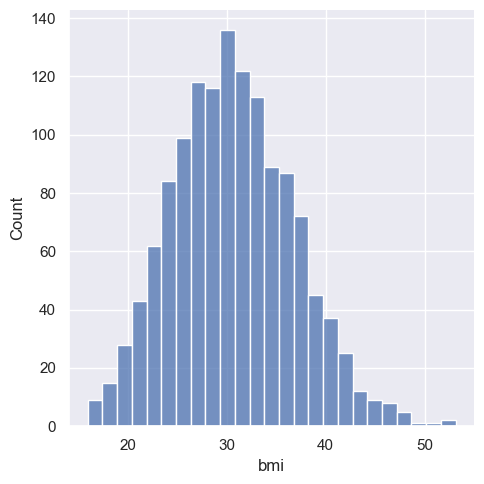

In [16]:
sns.displot(df['bmi'])
plt.show()

In [17]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

### Encoding data for regression :

In [18]:
df.replace({'sex':{'male':0,'female':1}}, inplace = True)
df.replace({'smoker':{'yes':0,'no':1}}, inplace = True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace = True)

C:\Users\ariha\AppData\Local\Temp\ipykernel_20080\1332605648.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':0,'female':1}}, inplace = True)
C:\Users\ariha\AppData\Local\Temp\ipykernel_20080\1332605648.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'yes':0,'no':1}}, inplace = True)
C:\Users\ariha\AppData\Local\Temp\ipykernel_20080\1332605648.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavio

In [19]:
x = df.drop(columns='charges', axis = 1)
y = df['charges']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

y_train

1191    13725.47184
366     13430.26500
1006     4438.26340
1258    30063.58055
362     13844.50600
           ...     
909     17496.30600
494     17942.10600
1296     1708.92575
619     10713.64400
1164     7153.55390
Name: charges, Length: 1070, dtype: float64

In [20]:

reg = LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

## R2 Score on Training data :

In [21]:
train_predict = reg.predict(x_train)

r2_train = metrics.r2_score(y_train,train_predict)
r2_train

0.744860580124333

## R2 Score on Test data :

In [22]:
test_predict = reg.predict(x_test)

metrics.r2_score(y_test,test_predict)

0.772110679309316

In [23]:
sample = (30,1,22.7,0,1,0)

in_sample = np.asarray(sample)

in_sample = in_sample.reshape(1,-1)

in_predict = reg.predict(in_sample)

c:\Users\ariha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
print("Insurance cost :", in_predict)

Insurance cost : [2767.06801127]


---------------------------------------------------------

# GOLD PRICE PREDICTION :

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv('Datasets\gld_price_data.csv')

df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01/02/08,1447.160034,84.860001,78.470001,15.180,1.471692
1,01/03/08,1447.160034,85.570000,78.370003,15.285,1.474491
2,01/04/08,1411.630005,85.129997,77.309998,15.167,1.475492
3,01/07/08,1416.180054,84.769997,75.500000,15.053,1.468299
4,01/08/08,1390.189941,86.779999,76.059998,15.590,1.557099


In [26]:
x = df.drop(columns =['GLD','Date'] )
y = df['GLD']

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) 

In [28]:
model = Sequential()

model.add(Dense(10,activation = 'relu',input_dim = 4))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(1,activation = 'linear'))
model.compile(loss = 'mean_squared_error',optimizer = 'Nadam')

c:\Users\ariha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
history = model.fit(x_train,y_train,epochs=100,validation_split=0.1)

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 15206.2188 - val_loss: 14868.2598
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15029.8750 - val_loss: 14393.6426
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14214.6377 - val_loss: 13686.4648
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13745.5869 - val_loss: 12645.5684
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12249.9053 - val_loss: 11198.2822
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10752.4707 - val_loss: 9359.7578
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8969.8379 - val_loss: 7093.5942
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6598.3623 - val_loss: 4838.7310
Epoch 9/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4310.5967 - val_loss: 2953.9253
Epoch 10/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2652.2402 - val_loss: 1666.2653
Epoch 11/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1467.0259 - val_lo

In [30]:
y_pred = model.predict(x_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [31]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.8754938115258659

---------------------------------------------------------

# 

In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import InputLayer, Conv2D, Dense, Flatten, Dropout
from keras.layers import GlobalMaxPool2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.models import Model
from keras import regularizers, optimizers
from keras.utils import to_categorical

from sklearn.metrics import accuracy_score

from keras.datasets import cifar10
(x_train,y_train), (x_test,y_test) = cifar10.load_data()
x_train[1]
x_train = x_train/255
x_test = x_test/255

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

model = Sequential()
model.add(InputLayer(shape=(32,32,3)))
model.add(Conv2D(32,3, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,2, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128,2, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

model.compile(loss='categorical_crossentropy',optimizer='nadam',metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 6, 6, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,538 (775.54 KB)

 Trainable params: 198,538 (775.54 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
history = model.fit(x_train,y_train,epochs=20,batch_size=100,verbose=1,validation_data=(x_test,y_test))

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.3603 - loss: 1.7498 - val_accuracy: 0.5566 - val_loss: 1.2264
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.5877 - loss: 1.1587 - val_accuracy: 0.6346 - val_loss: 1.0470
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.6534 - loss: 0.9884 - val_accuracy: 0.6491 - val_loss: 0.9887
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.6915 - loss: 0.8888 - val_accuracy: 0.6881 - val_loss: 0.8913
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.7205 - loss: 0.8017 - val_accuracy: 0.7044 - val_loss: 0.8573
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.7502 - loss: 0.7166 - val_accuracy: 0.7185 - val_loss: 0.8161
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.7685 - loss: 0.6605 - val_accuracy: 0.7275 - val_loss: 0.8060
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.7845 - loss: 0.6130 - 

KeyboardInterrupt: 

---------------------------------------------------------

# Stock Price - Gold Prediction :

In [8]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
plt.style.use('fivethirtyeight')

import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('Datasets/MSFT.csv')

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


## Visualizing data :

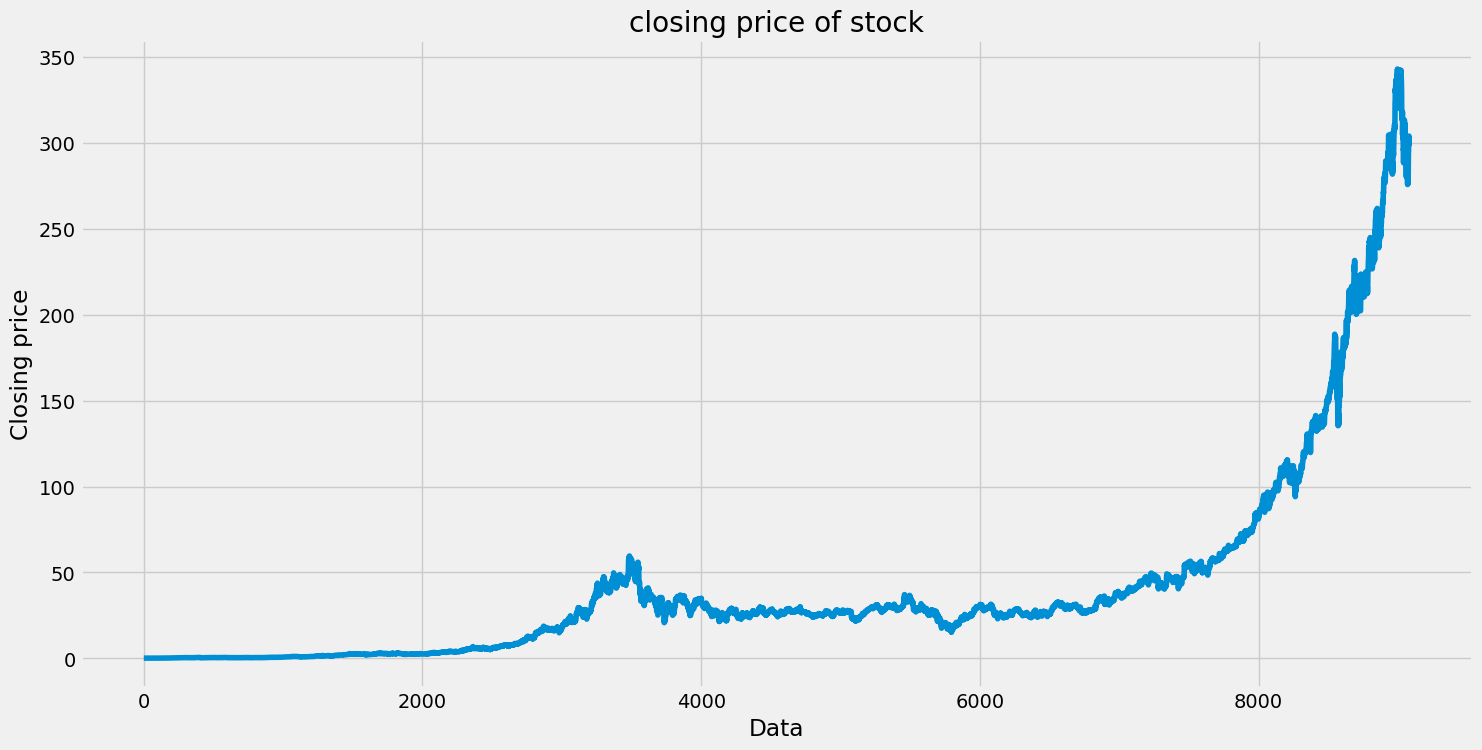

In [10]:
plt.figure(figsize=(16,8))
plt.title('closing price of stock')
plt.plot(df['Close'])
plt.xlabel('Data')
plt.ylabel('Closing price')
plt.show()

## Filtering data :

In [11]:
data = df.filter(['Close'])
dataset = data.values

training_data_len = math.ceil(len(dataset)*0.8)

scaler = StandardScaler()

scaled_data = scaler.fit_transform(dataset)

print("Mean of processed data :", scaled_data.mean())
print("Standard Deviation of processed data :", scaled_data.std())

Mean of processed data : 1.0013153162753806e-16
Standard Deviation of processed data : 1.0


## Creating training data :

In [12]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i])
    y_train.append(train_data[i])

x_train,y_train = np.array(x_train),np.array(y_train)

x_train.shape

(7207, 60, 1)

In [13]:
print("x_train shape before reshaping :", x_train.shape)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print("x_train shape after reshaping :", x_train.shape)

x_train shape before reshaping : (7207, 60, 1)
x_train shape after reshaping : (7207, 60, 1)


In [14]:
model = Sequential()
model.add(LSTM(200,return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(LSTM(200,return_sequences=False))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1))

model.compile(optimizer='nadam', loss='mean_squared_error')

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 200)        │       161,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 507,601 (1.94 MB)

 Trainable params: 507,601 (1.94 MB)

 Non-trainable params: 0 (0.00 B)

### Training model :

In [18]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 27s 120ms/step - loss: 2.8196e-04
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 31s 138ms/step - loss: 1.6006e-04
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 32s 142ms/step - loss: 1.4407e-04
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 31s 139ms/step - loss: 1.4761e-04
Epoch 5/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 32s 139ms/step - loss: 1.2445e-04
Epoch 6/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 31s 138ms/step - loss: 1.1737e-04
Epoch 7/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 31s 138ms/step - loss: 1.0433e-04
Epoch 8/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 32s 141ms/step - loss: 1.0291e-04
Epoch 9/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 32s 140ms/step - loss: 1.0291e-04
Epoch 10/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 31s 138ms/step - loss: 8.9576e-05


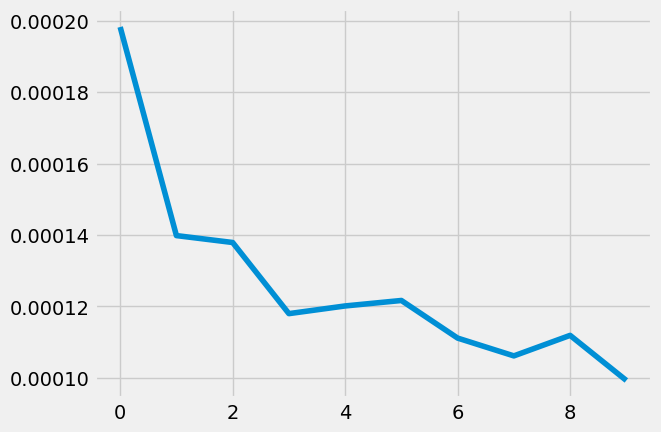

In [19]:
plt.plot(history.history['loss'])

In [20]:
test_data = scaled_data[training_data_len-60:,:]
x_test = []
y_test = dataset[training_data_len:,:]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

x_test = np.array(x_test)

x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

prediction = model.predict(x_test)

prediction = scaler.inverse_transform(prediction)

print(prediction)

57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step
[[ 46.666656]
 [ 48.04287 ]
 [ 47.69556 ]
 ...
 [297.17276 ]
 [300.52167 ]
 [298.4389  ]]


In [21]:
from sklearn.metrics import r2_score

r2_score(y_test,prediction)

0.9983009190528196